In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Park\AppData\Local\Temp\ipykernel_27116\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("high_diamond_ranked_10min.csv")

In [4]:
df.head()

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  ...  \
0          9           6           11                  0            0  ...   
1          5           5            5                  0            0  ...   
2          7          11            4                  1            1  ...   
3          4           5            5                  1            0  ...   
4          6           6            6                  0            0  ...   

   redTowersDestroyed  redTotalGold  redAvgLevel  redTotalExperience  \
0                   0         16567          6.8               17047   
1                   1         17620          6.8               17438   
2                   0         17285          6.8               17254   
3                   0         16478          7.0               17961   
4                   0         17404          7.0               18313   

   redTotalMinionsKilled  redTotalJungleMinionsKilled  redGoldDiff  \
0                    197                           55         -643   
1                    240                           52         2908   
2                    203                           28         1172   
3                    235                           47         1321   
4                    225                           67         1004   

   redExperienceDiff  redCSPerMin  redGoldPerMin  
0                  8         19.7         1656.7  
1               1173         24.0         1762.0  
2               1033         20.3         1728.5  
3                  7         23.5         1647.8  
4               -230         22.5         1740.4  

[5 rows x 40 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [6]:
print(df.columns)


Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')


There are no null/ missing values to be removed

### **EDA**

In [7]:
df1 = df.copy()

Check relationships of Blue Team's features

In [8]:
cols = ['gameId', 'redFirstBlood', 'redKills','redDeaths',
        'redGoldDiff', 'redExperienceDiff']
df1 = df1.drop(cols, axis = 1)

In [9]:
print(df1.columns)

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds',
       'redTowersDestroyed', 'redTotalGold', 'redAvgLevel',
       'redTotalExperience', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')


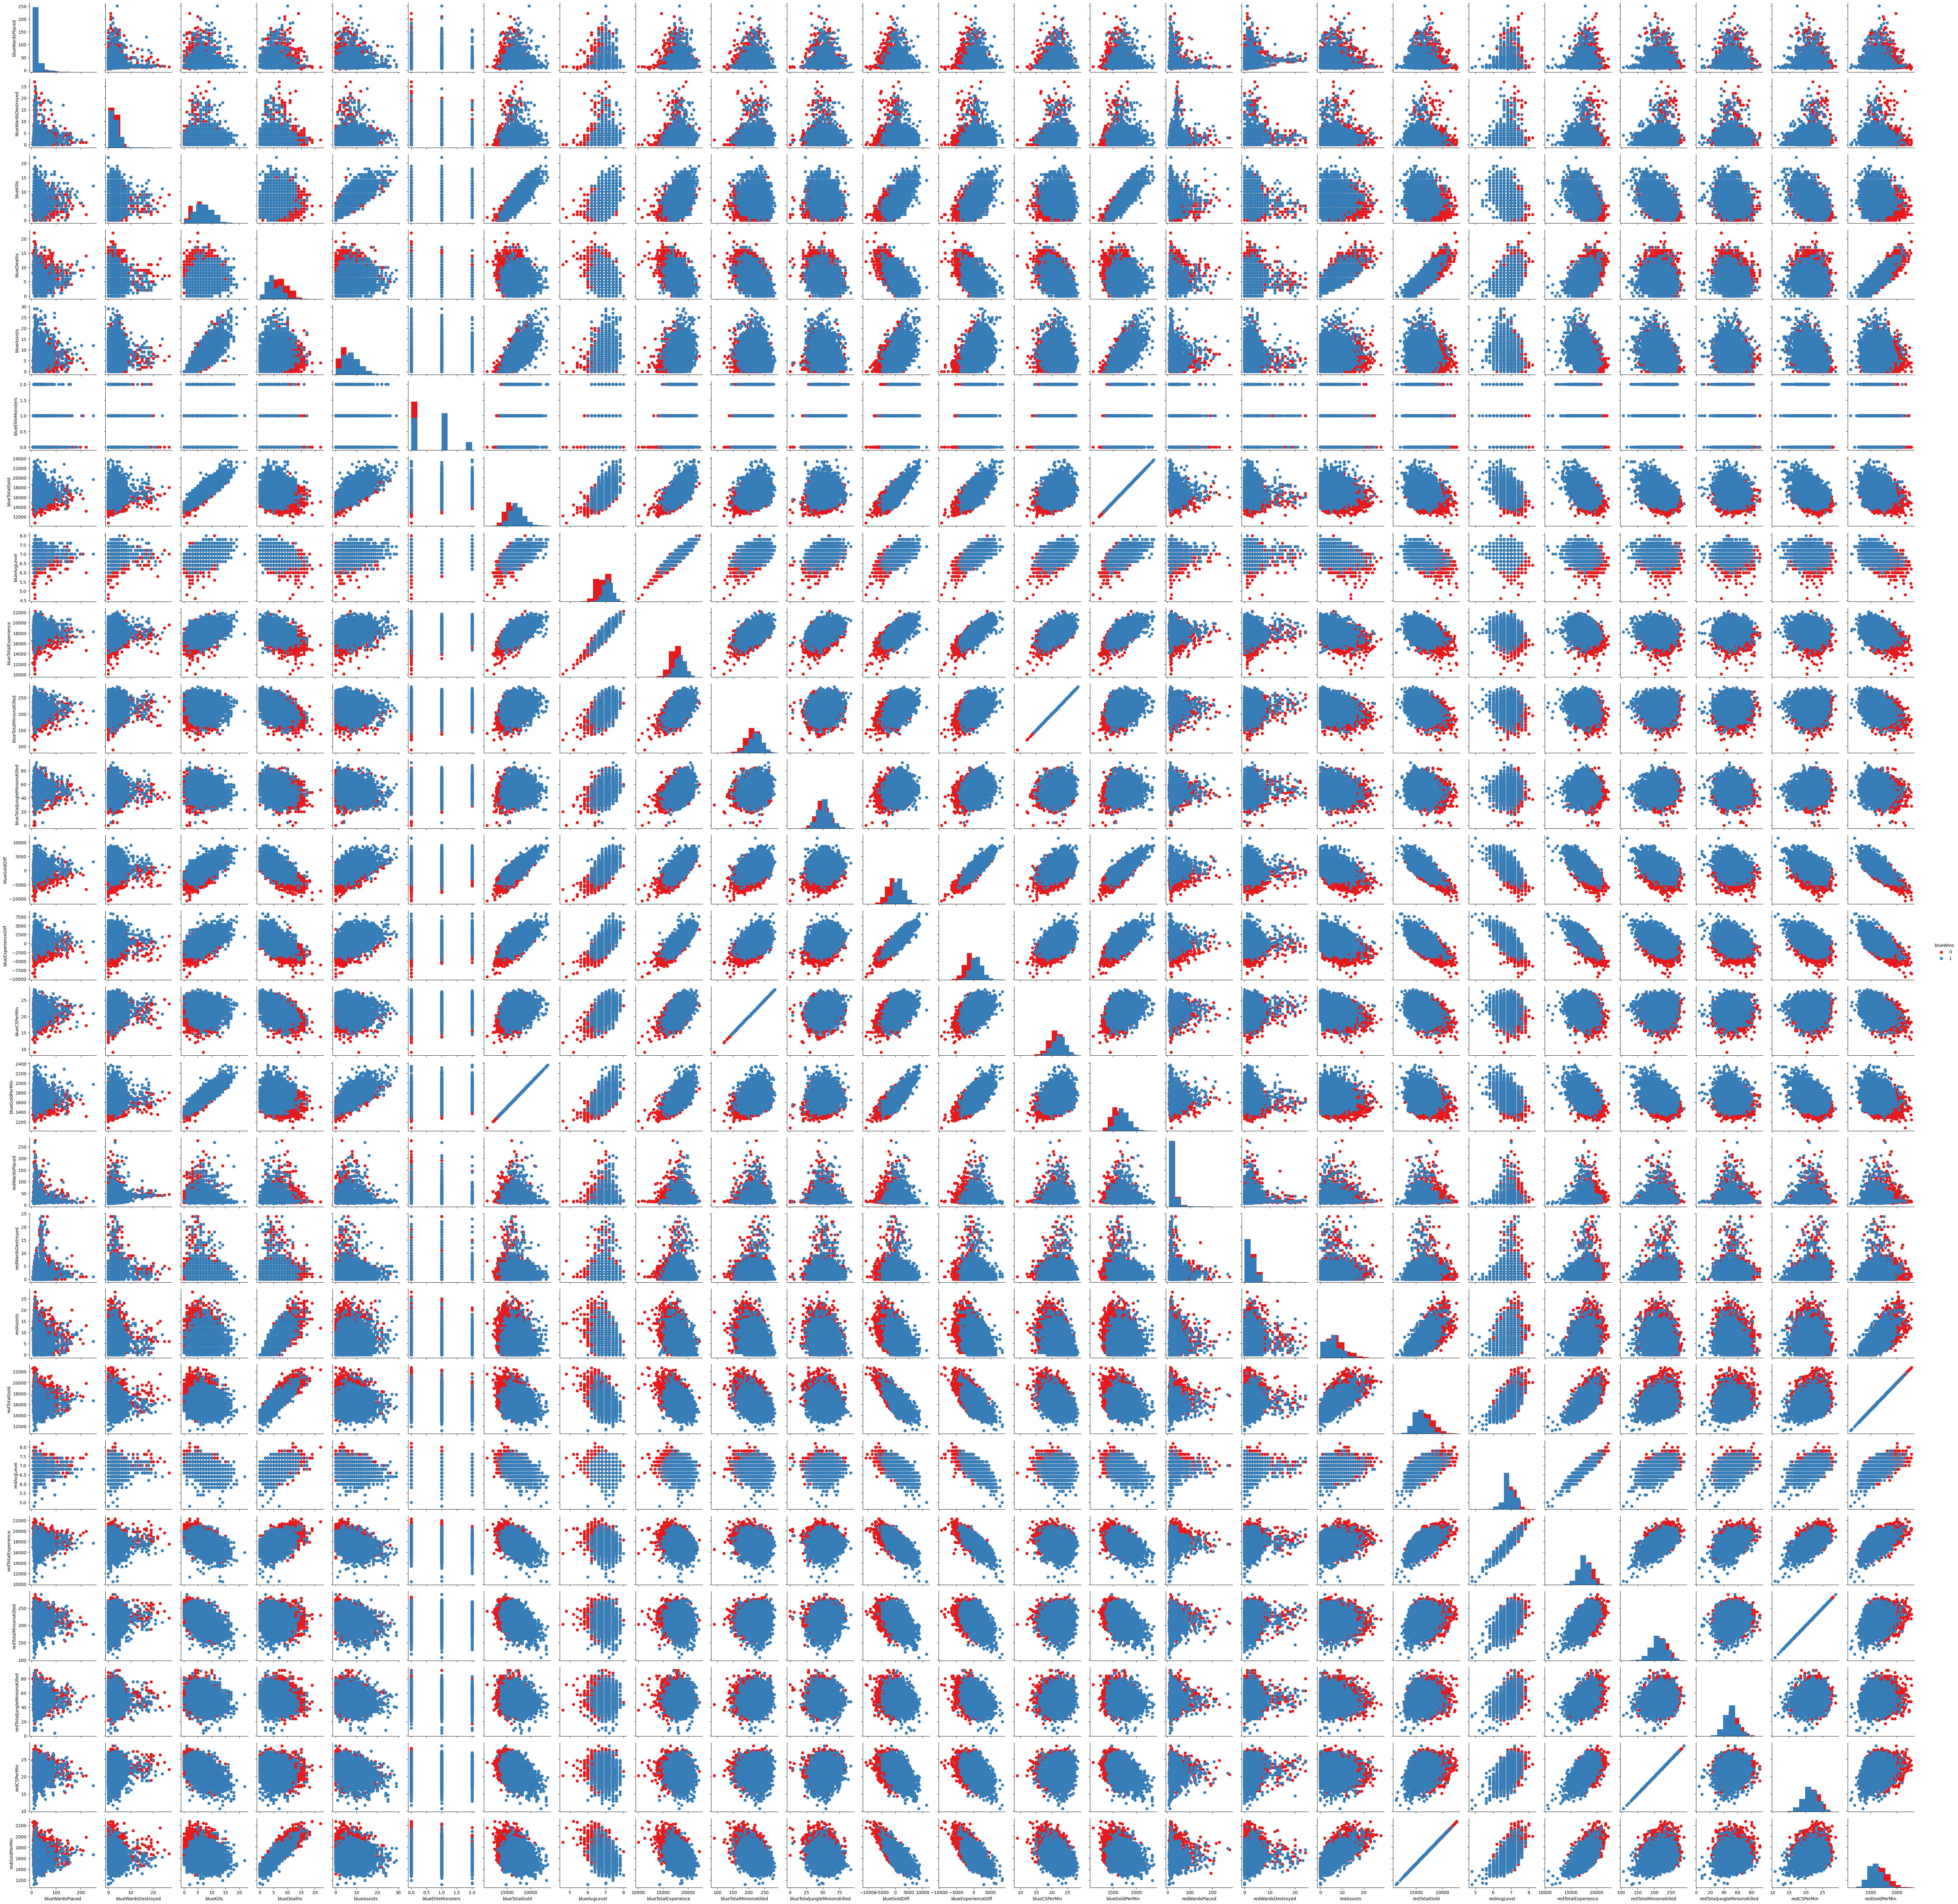

In [10]:
g = sns.PairGrid(data=df1, vars=['blueWardsPlaced', 'blueWardsDestroyed', 
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redTotalGold', 'redAvgLevel',
       'redTotalExperience', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin'], hue='blueWins', palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

Check Collinearity of Blue Team features

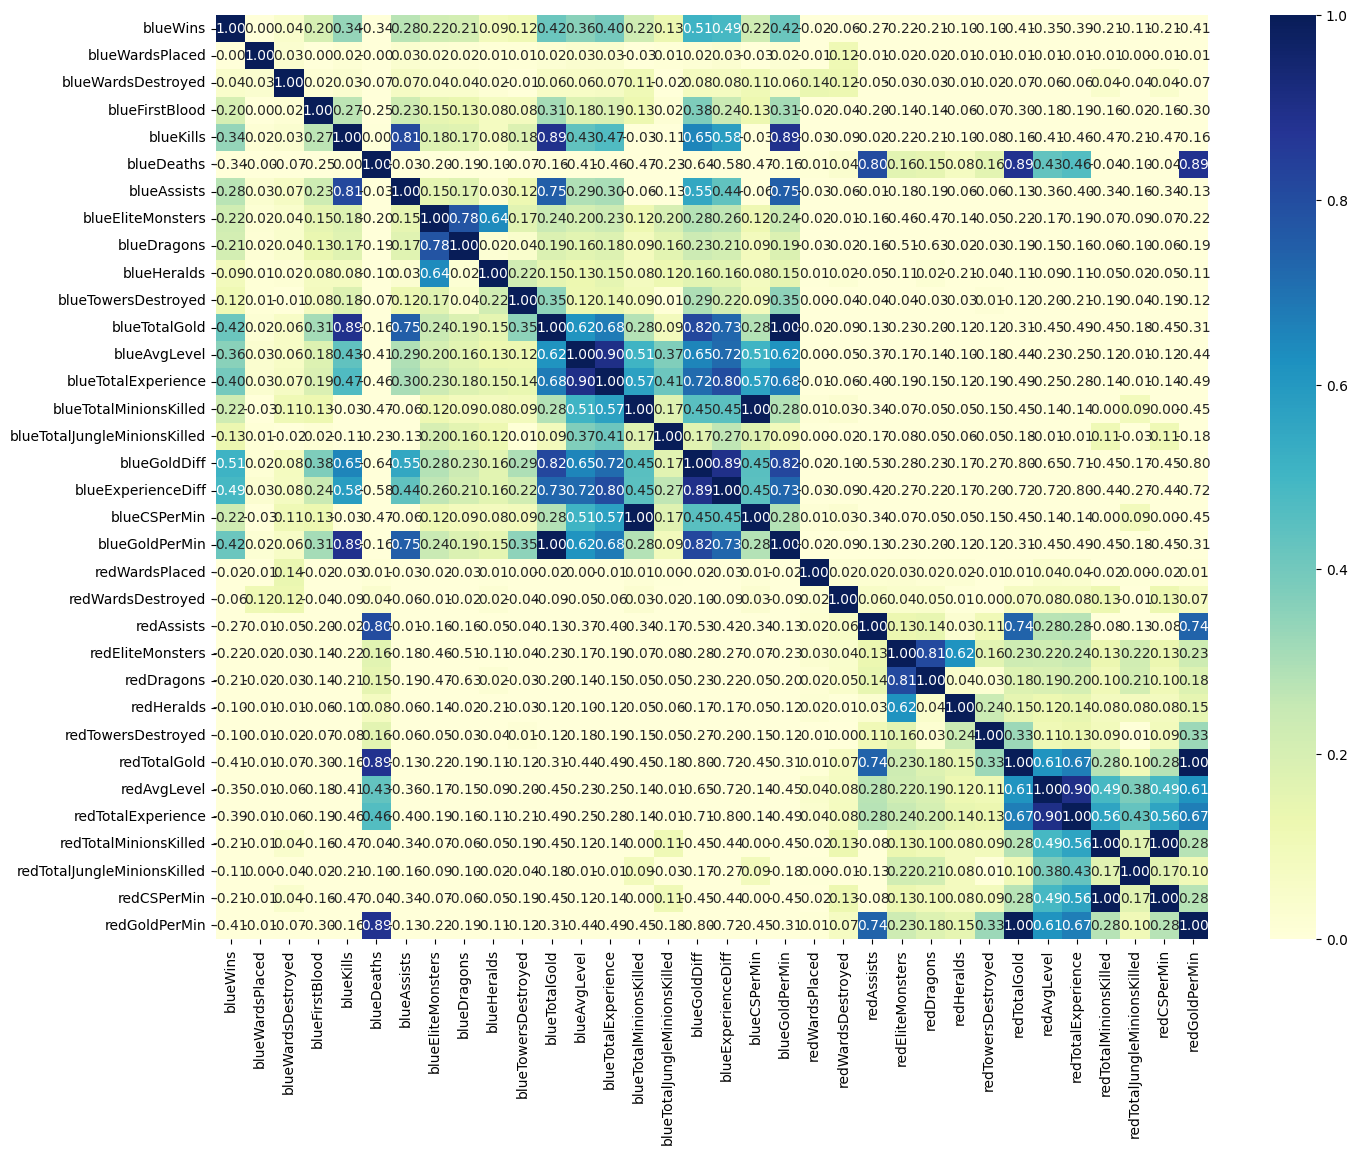

In [11]:
plt.figure(figsize=(16, 12))
sns.heatmap(df1.corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

Clean the dataset based on the collinearity

In [12]:
corr = df1.corr()
high_corr_columns = []

for i, column in enumerate(corr.columns):
    for j, row in enumerate(corr.columns):
        if i < j and abs(corr.at[row, column]) >= 0.8:
            high_corr_columns.append((column, row))

print(high_corr_columns)

[('blueKills', 'blueAssists'), ('blueKills', 'blueTotalGold'), ('blueKills', 'blueGoldPerMin'), ('blueDeaths', 'redAssists'), ('blueDeaths', 'redTotalGold'), ('blueDeaths', 'redGoldPerMin'), ('blueTotalGold', 'blueGoldDiff'), ('blueTotalGold', 'blueGoldPerMin'), ('blueAvgLevel', 'blueTotalExperience'), ('blueTotalExperience', 'blueExperienceDiff'), ('blueTotalMinionsKilled', 'blueCSPerMin'), ('blueGoldDiff', 'blueExperienceDiff'), ('blueGoldDiff', 'blueGoldPerMin'), ('blueGoldDiff', 'redTotalGold'), ('blueGoldDiff', 'redGoldPerMin'), ('blueExperienceDiff', 'redTotalExperience'), ('redEliteMonsters', 'redDragons'), ('redTotalGold', 'redGoldPerMin'), ('redAvgLevel', 'redTotalExperience'), ('redTotalMinionsKilled', 'redCSPerMin')]


In [13]:
cols = ['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueAssists', 'blueEliteMonsters'
        , 'blueHeralds', 'blueTowersDestroyed', 'blueTotalExperience', 'blueTotalJungleMinionsKilled',
'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
'redAssists', 'redEliteMonsters', 'redHeralds',
'redTowersDestroyed', 'redTotalExperience', 'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin']
df1 = df1[cols]

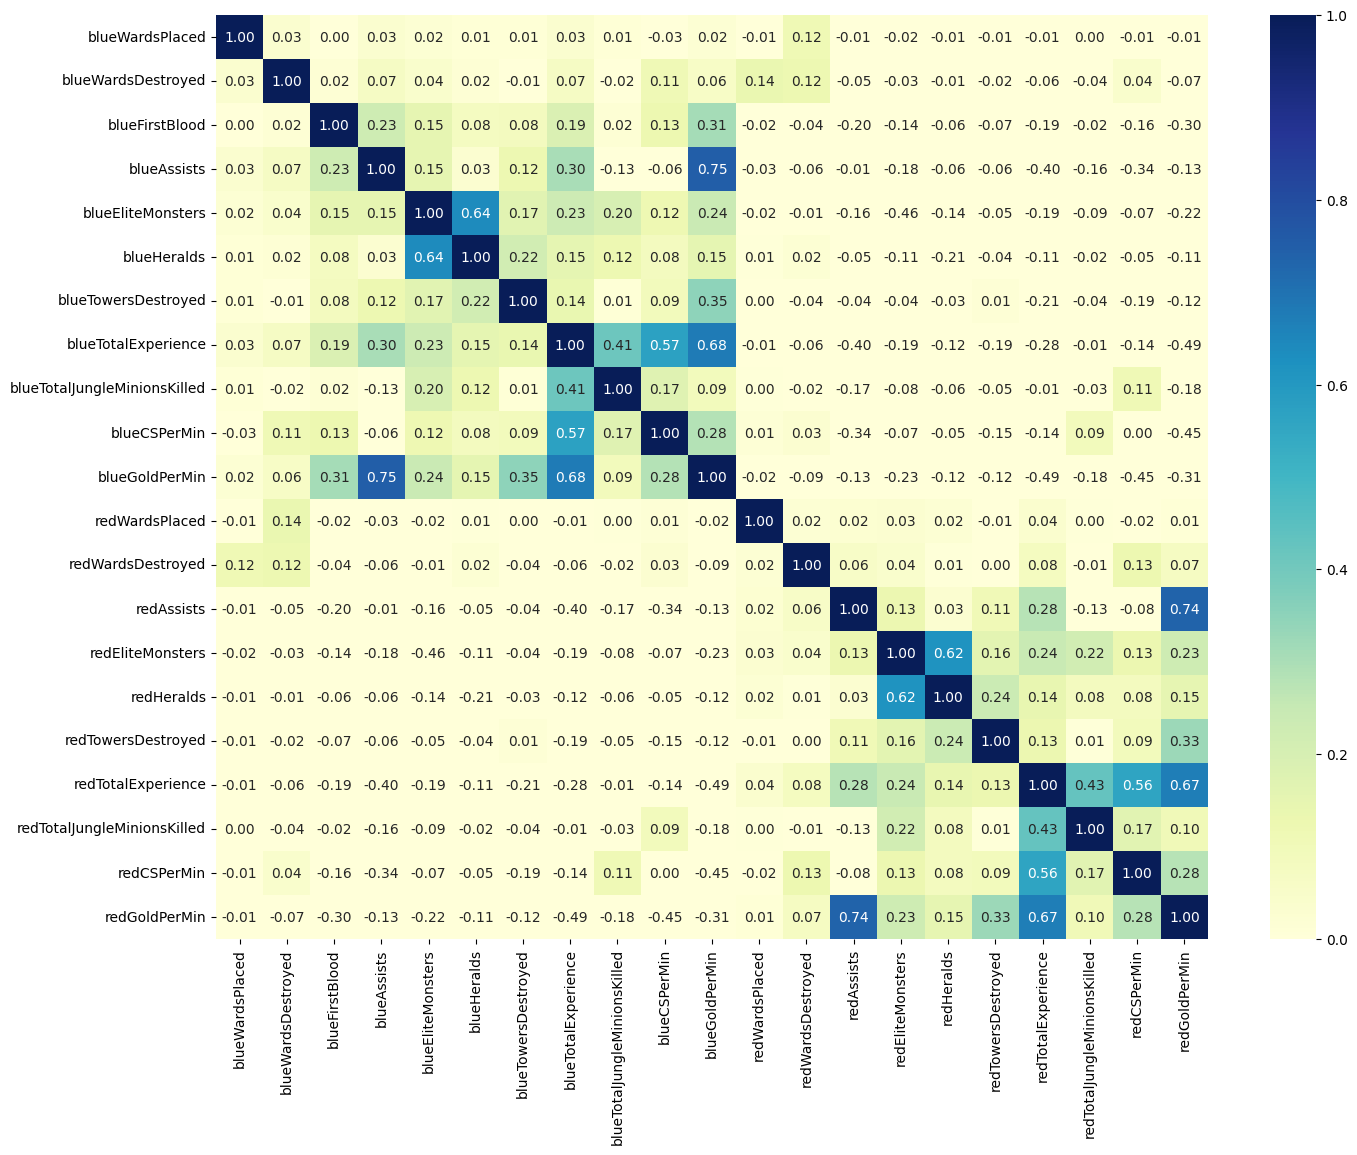

In [14]:
plt.figure(figsize=(16, 12))
sns.heatmap(df1.drop('blueWins', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

Create a histogram of of cleaned, new dataframe

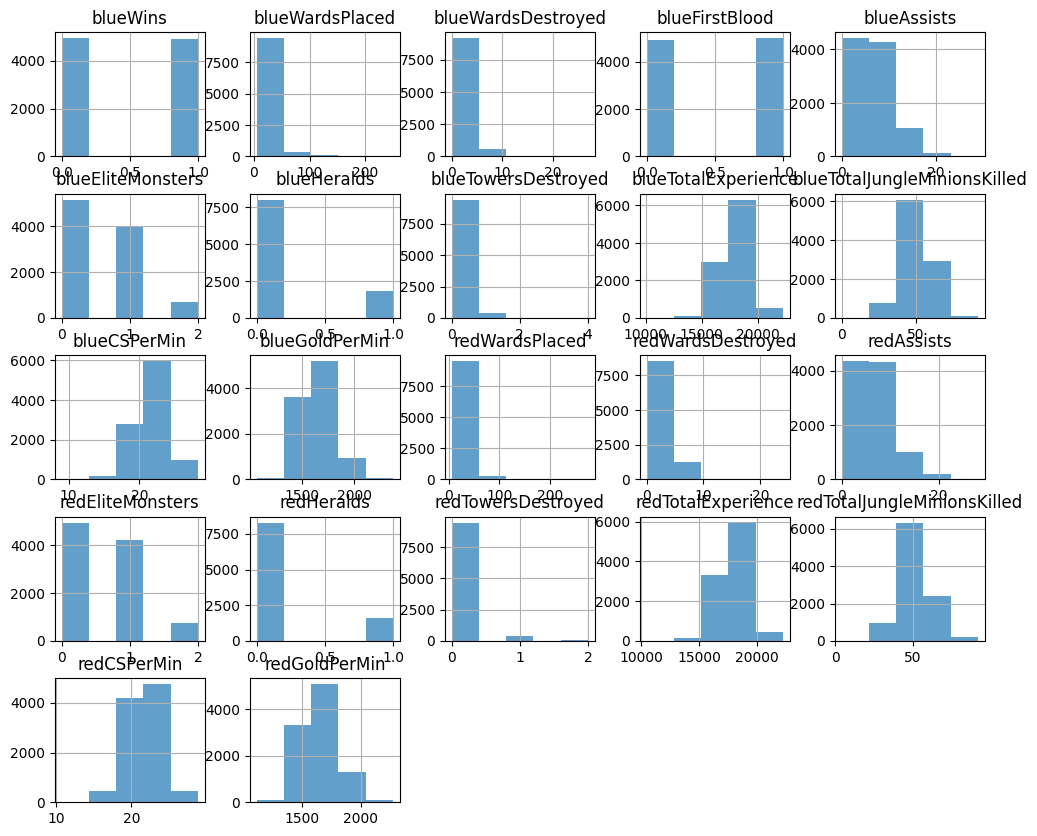

In [15]:
df1.hist(alpha = 0.7, figsize=(12,10), bins=5);

### **Feature Engineering**

In [16]:
df1['blueHelpful'] = np.where(df['blueKills'] != 0, df['blueAssists'] / df['blueKills'], 0)
df1['redHelpful'] = np.where(df['blueDeaths'] != 0, df['redAssists'] / df['blueDeaths'], 0)

df1['blueJunglePercentage'] = df['blueTotalJungleMinionsKilled'] / df['blueTotalMinionsKilled']
df1['redJunglePercentage'] = df['redTotalJungleMinionsKilled'] / df['redTotalMinionsKilled']

df1['redWardsRemaining'] = df['redWardsPlaced'] - df['blueWardsDestroyed']
df1['blueWardsRemaining'] = df['blueWardsPlaced'] - df['redWardsDestroyed']

C:\Users\Park\AppData\Local\Temp\ipykernel_27116\506726123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['blueHelpful'] = np.where(df['blueKills'] != 0, df['blueAssists'] / df['blueKills'], 0)
C:\Users\Park\AppData\Local\Temp\ipykernel_27116\506726123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['redHelpful'] = np.where(df['blueDeaths'] != 0, df['redAssists'] / df['blueDeaths'], 0)
C:\Users\Park\AppData\Local\Temp\ipykernel_27116\506726123.py:4: SettingWithCopyWarning: 
A value is tryin

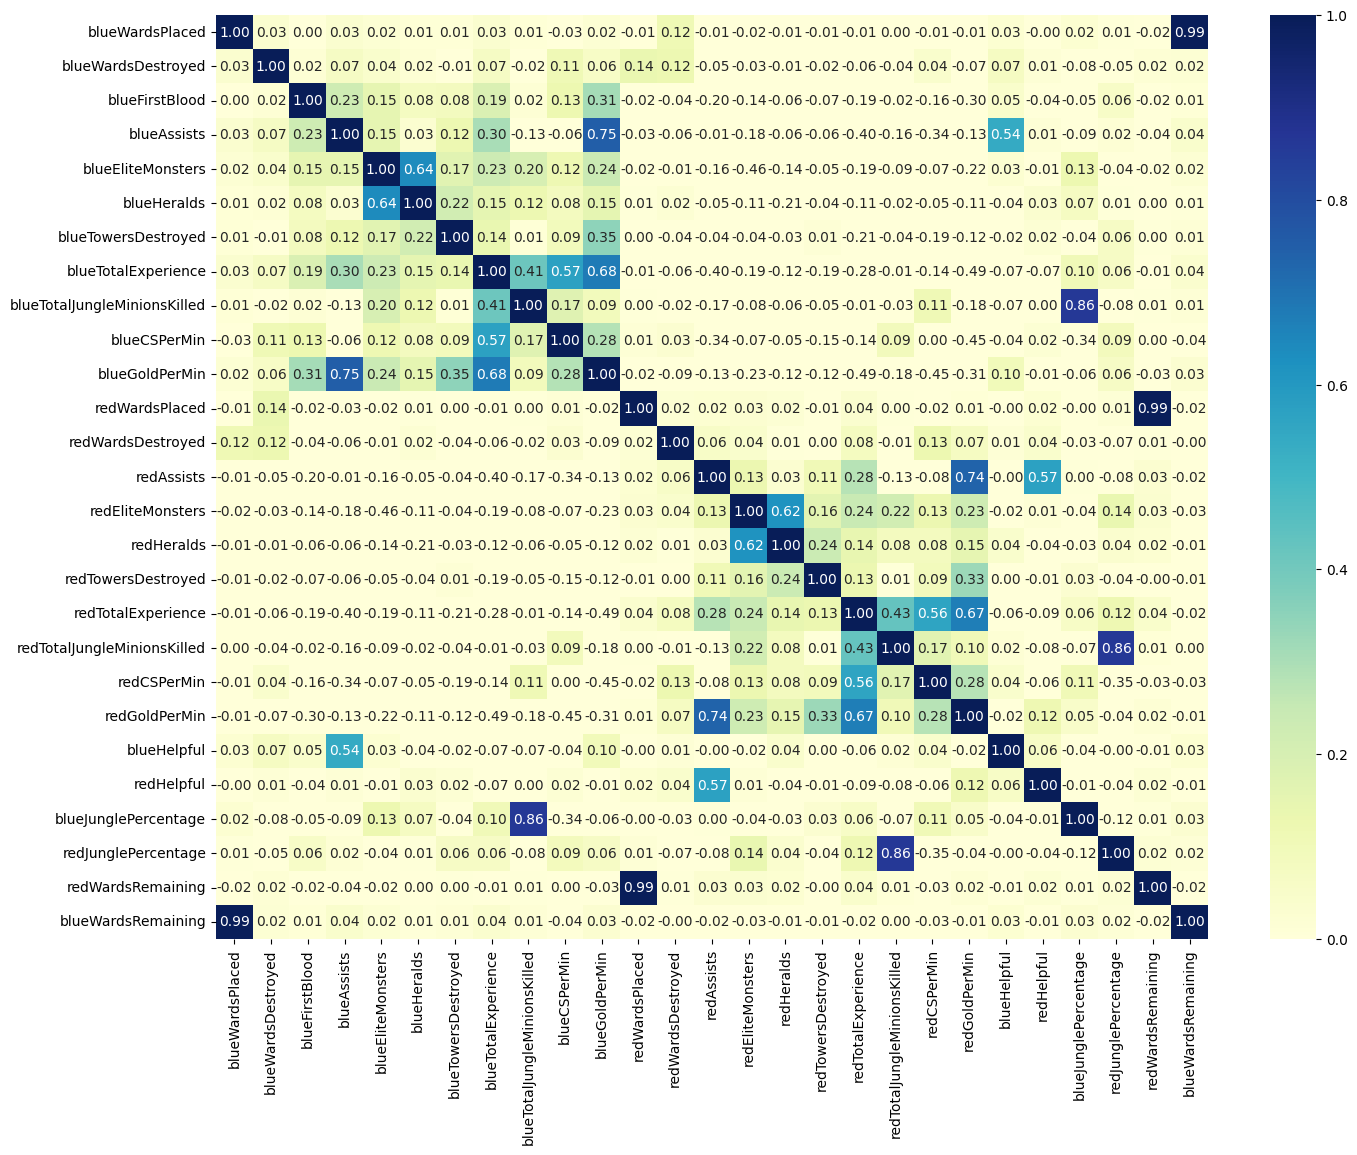

In [17]:
plt.figure(figsize=(16, 12))
sns.heatmap(df1.drop('blueWins', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

In [18]:
df1 = df1.drop(['blueWardsPlaced', 'redWardsPlaced','blueJunglePercentage','redJunglePercentage'], axis=1)

### **Train Test Split**

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = df1.drop('blueWins', axis=1)
y = df1['blueWins']
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X.shape

(9879, 23)

### **Logistic Regression**

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': [None, 'l2'],
}

log_reg = LogisticRegression()
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model_log = grid_search.best_estimator_
y_pred = best_model_log.predict(X_test)

acc_reg = accuracy_score(y_test, y_pred)

print("Accuracy on test set: ", acc_reg)
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\Park\anaconda3\envs\MLproduction\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Park\anaconda3\envs\MLproduction\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Park\anaconda3\envs\MLproduction\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Park\anaconda3\envs\MLproduction\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Park\anaconda3\envs\MLproduction\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Park\anaconda3\envs\MLprod

Best parameters found:  {'C': 10, 'penalty': 'l2'}
Accuracy on test set:  0.7312753036437247
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       983
           1       0.73      0.73      0.73       993

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976



C:\Users\Park\AppData\Local\Temp\ipykernel_27116\102179204.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette=bar_colors)


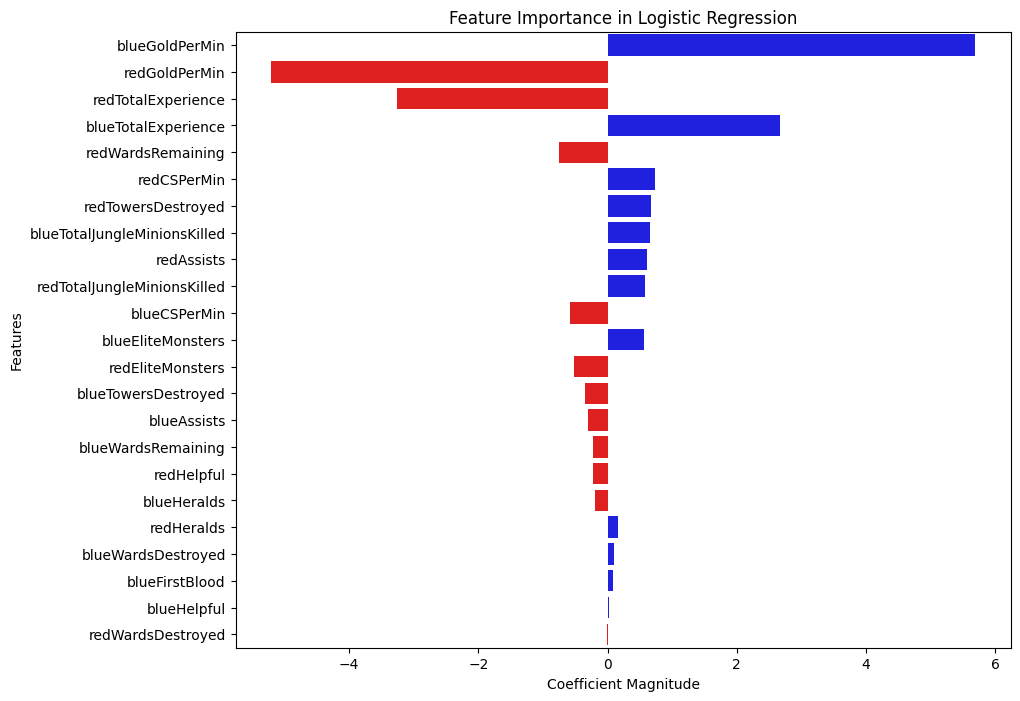

In [22]:
coefficients = best_model_log.coef_[0]
feature_names = df1.drop('blueWins', axis=1).columns
feature_importance = pd.Series(coefficients, index=feature_names).sort_values(key=abs, ascending=False)
plt.figure(figsize=(10, 8))
bar_colors = ['red' if x < 0 else 'blue' for x in feature_importance]
sns.barplot(x=feature_importance, y=feature_importance.index, palette=bar_colors)

plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.show()

In [23]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5, random_state=42, max_iter=10000)
lasso.fit(X, y)
lasso.alpha_

7.666414850936638e-05

In [24]:
selected_features = np.where(lasso.coef_ != 0)[0]

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': [None, 'l2'],
}

log_reg = LogisticRegression()
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train[:, selected_features], y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model_log_fs = grid_search.best_estimator_
y_pred = best_model_log_fs.predict(X_test[:, selected_features])

acc_reg_fs = accuracy_score(y_test, y_pred)

print("Accuracy on test set: ", acc_reg_fs)
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\Park\anaconda3\envs\MLproduction\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Park\anaconda3\envs\MLproduction\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Park\anaconda3\envs\MLproduction\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Park\anaconda3\envs\MLproduction\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Park\anaconda3\envs\MLproduction\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Park\anaconda3\envs\MLprod

Best parameters found:  {'C': 100, 'penalty': 'l2'}
Accuracy on test set:  0.7317813765182186
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       983
           1       0.73      0.73      0.73       993

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976



### **Random Forest**

In [26]:
# fit the decision tree model
from sklearn import tree

tree = tree.DecisionTreeClassifier()

# search the best params
grid = {'min_samples_split': [5, 10, 20, 50, 100]}

clf_tree = GridSearchCV(tree, grid, cv=5)
clf_tree.fit(X_train, y_train)

pred_tree = clf_tree.predict(X_test)

# get the accuracy score
acc_tree = accuracy_score(pred_tree, y_test)
print(acc_tree)

0.6847165991902834


In [27]:
feature_names = df1.columns
class_names = ['Lose', 'Win']

print("Feature names:", list(feature_names))
print("Class names:", list(class_names))

Feature names: ['blueWins', 'blueWardsDestroyed', 'blueFirstBlood', 'blueAssists', 'blueEliteMonsters', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalExperience', 'blueTotalJungleMinionsKilled', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsDestroyed', 'redAssists', 'redEliteMonsters', 'redHeralds', 'redTowersDestroyed', 'redTotalExperience', 'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin', 'blueHelpful', 'redHelpful', 'redWardsRemaining', 'blueWardsRemaining']
Class names: ['Lose', 'Win']


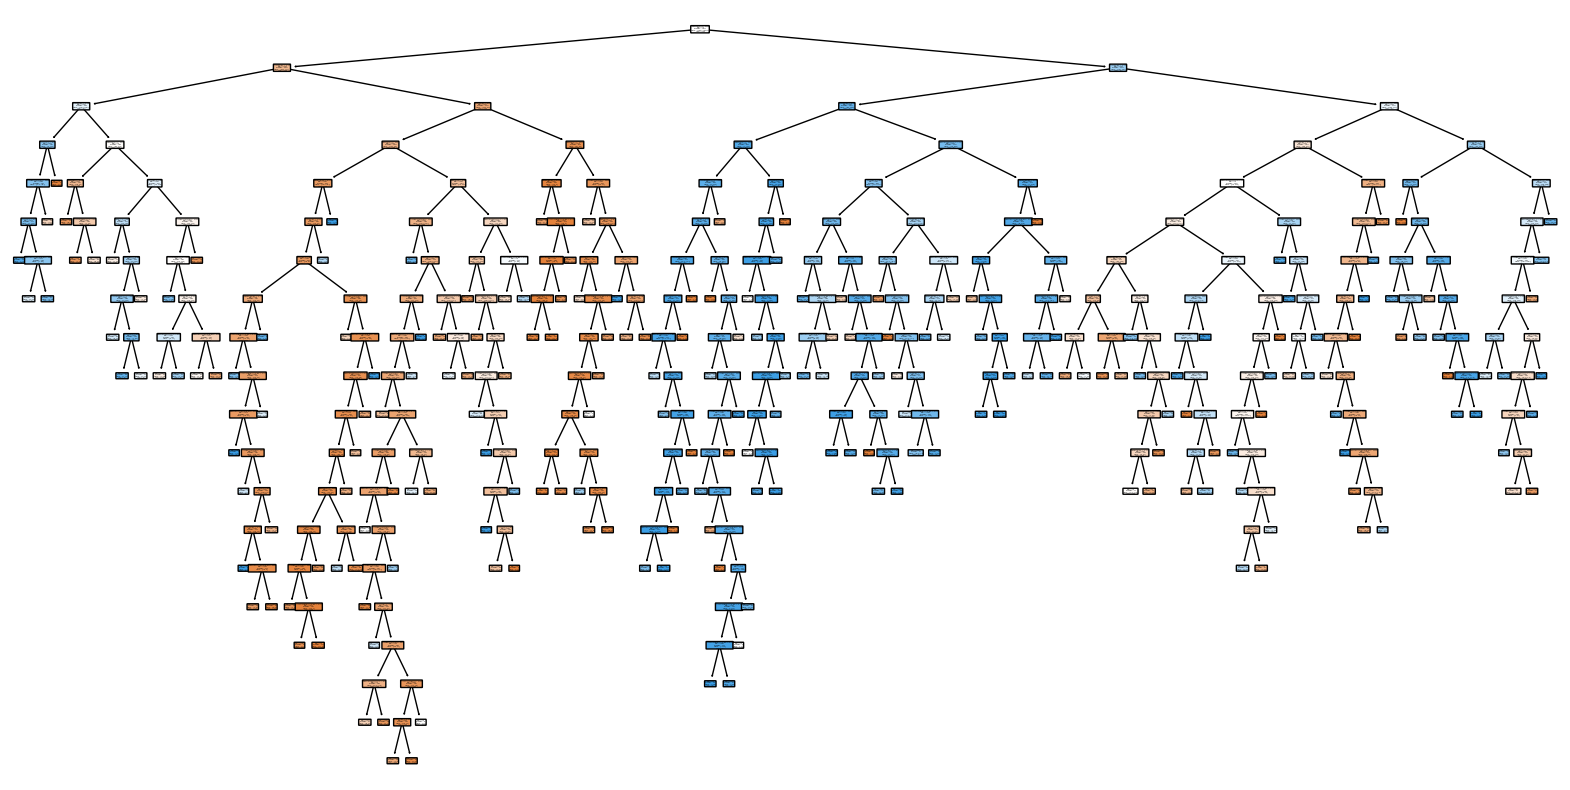

In [28]:
from sklearn.tree import plot_tree

# Extract the best estimator
best_tree = clf_tree.best_estimator_

# plot the best decision tree
plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True, rounded=True, feature_names=feature_names, class_names=class_names)
plt.show()

Simplify the Decision Tree

In [29]:
from sklearn import tree
tree1 = tree.DecisionTreeClassifier()

# search the best params
grid = {'min_samples_split': [5]}

clf_tree1 = GridSearchCV(tree1, grid, cv=5)
clf_tree1.fit(X_train, y_train)

pred_tree1 = clf_tree1.predict(X_test)

# get the accuracy score
acc_tree1 = accuracy_score(pred_tree, y_test)
print(acc_tree1)

0.6847165991902834


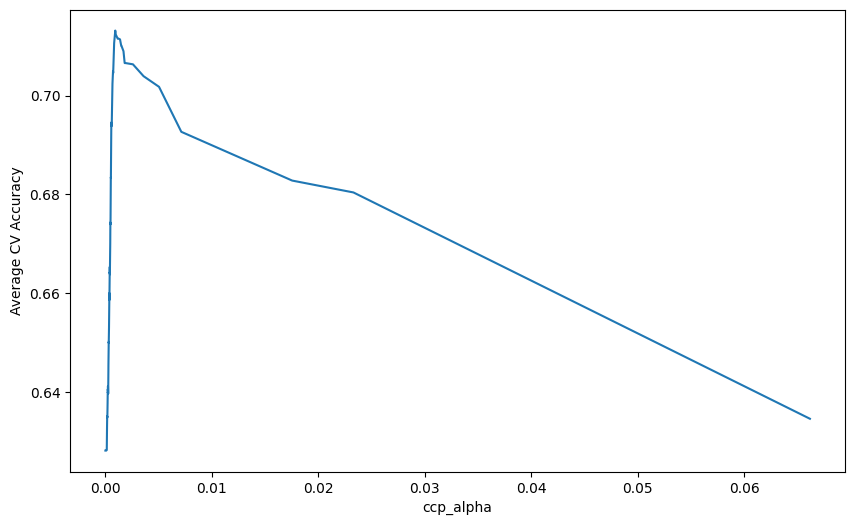

Optimal ccp_alpha: 0.000929556151518126


DecisionTreeClassifier(ccp_alpha=0.000929556151518126, random_state=42)

In [30]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier

clf = tree.DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Evaluate the effect of ccp_alpha on cross-validation accuracy
accuracy_scores = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    accuracy_scores.append(np.mean(scores))

# Plot the accuracy scores against ccp_alpha values
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, accuracy_scores)
plt.xlabel('ccp_alpha')
plt.ylabel('Average CV Accuracy')
plt.show()

# Select the ccp_alpha that maximizes accuracy
optimal_ccp_alpha = ccp_alphas[np.argmax(accuracy_scores)]
print('Optimal ccp_alpha:', optimal_ccp_alpha)

# Rebuild the tree using the optimal ccp_alpha
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_alpha)
clf.fit(X_train, y_train)


In [31]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_alpha)
clf.fit(X_train, y_train)

pred_tree2 = clf.predict(X_test)

# get the accuracy score
acc_tree2 = accuracy_score(pred_tree2, y_test)
print(acc_tree2)

0.7100202429149798


### **Random Forest**

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# search the best params
grid = {'n_estimators':[100,200,300,400,500], 'max_depth': [2, 5, 10]}

clf_rf = GridSearchCV(rf, grid, cv=5)
clf_rf.fit(X_train, y_train)

pred_rf = clf_rf.predict(X_test)
# get the accuracy score
acc_rf = accuracy_score(pred_rf, y_test)
print(acc_rf)

0.7206477732793523


In [33]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, pred_rf)

# Print the confusion matrix
print(conf_matrix)

[[712 271]
 [281 712]]


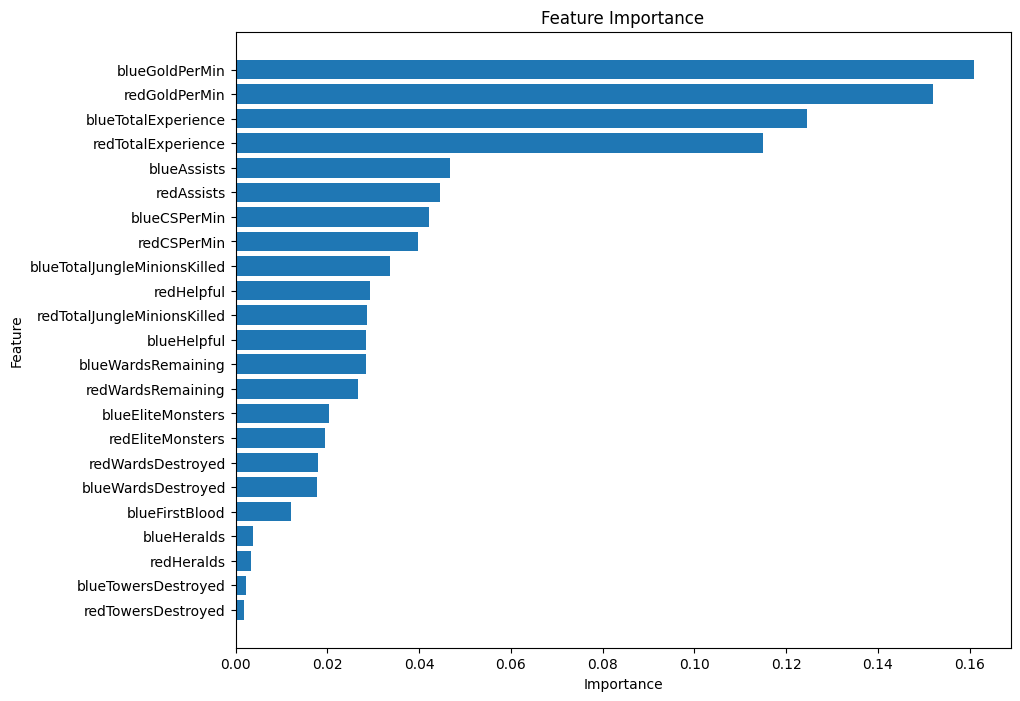

In [34]:
best_rf = clf_rf.best_estimator_

feature_importances = best_rf.feature_importances_
feature_names = df1.drop('blueWins', axis=1).columns.tolist()

features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by the importances to make the plot more informative
features_df = features_df.sort_values(by='Importance', ascending=True)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### **PCA**

In [35]:

X = df1.drop('blueWins', axis=1)
y = df1['blueWins']
# PCA is affected by scale, scale the dataset first
from sklearn import preprocessing
# Standardizing the features
X = preprocessing.StandardScaler().fit_transform(X)

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.18636615 0.09684211]


In [37]:
# create visulization df

df_vis = pd.DataFrame(data = components, columns = ['pc1', 'pc2'])
df_vis = pd.concat([df_vis, df1['blueWins']], axis = 1)
X = df_vis[['pc1', 'pc2']]
y = df_vis['blueWins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# refit the pca data into random forest
clf_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [39]:
# visualize function
from matplotlib.colors import ListedColormap
def DecisionBoundary(clf):
    X = df_vis[['pc1', 'pc2']]
    y = df_vis['blueWins']

    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

#Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

c:\Users\Park\anaconda3\envs\MLproduction\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


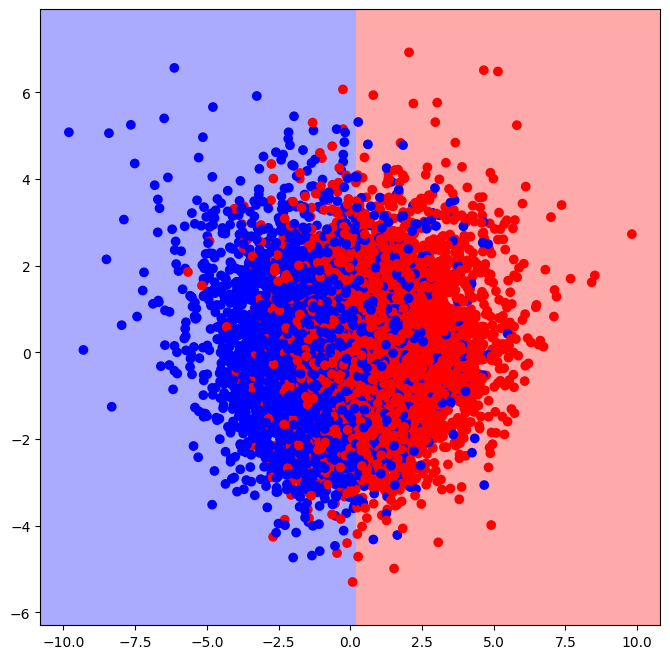

In [40]:
DecisionBoundary(clf_rf)

### **LightGBM** 

In [43]:
import lightgbm as lgb

param_grid = {
    'num_leaves': [31, 50, 100], 
    'learning_rate': [0.01, 0.1, 0.5], 
    'n_estimators': [100, 200, 500],
    'max_depth': [-1, 5, 10],
}

lgbm = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=42)

grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model_gbm = grid_search.best_estimator_
y_pred = best_model_gbm.predict(X_test)

acc_gbm = accuracy_score(y_test, y_pred)

print("Accuracy on test set: ", acc_gbm)
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 3937, number of negative: 3966
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 7903, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498165 -> initscore=-0.007339
[LightGBM] [Info] Start training from score -0.007339
Best parameters found:  {'learning_rate': 0.01, 'max_depth': -1, 'n_estimators': 500, 'num_leaves': 31}
Accuracy on test set:  0.7302631578947368
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.73       983
           1       0.73      0.74      0.73       993

    accuracy                           0.73      19

### **XGBoost** 

In [46]:
import xgboost as xgb

param_grid = {
    'max_depth': [3, 6, 10], 
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model_xgb = grid_search.best_estimator_
y_pred = best_model_xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred)

print("Accuracy on test set: ", acc_xgb)
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Accuracy on test set:  0.7262145748987854
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.68      0.71       983
           1       0.71      0.77      0.74       993

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976



### **GradientBoostingClassifier**

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300], 
    'max_depth': [3, 5, 7], 
    'min_samples_split': [2, 4],  
    'min_samples_leaf': [1, 2],
}
gb_clf = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model_gb = grid_search.best_estimator_
y_pred = best_model_gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred)

print("Accuracy on test set: ", acc_gb)
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on test set:  0.7246963562753036
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.68      0.71       983
           1       0.71      0.77      0.74       993

    accuracy                           0.72      1976
   macro avg       0.73      0.72      0.72      1976
weighted avg       0.73      0.72      0.72      1976



## Model Performance Comparison

In [48]:
# Define the model names and their corresponding accuracy scores or other performance metrics
model_names = ['Logistic Regression', 'Decision Tree', 'Decision Tree (Simplified)', 'Decision Tree (Optimized)', 'Random Forest', 
               'LightGBM', 'XGBoost', 'Gradient Boosting']
accuracy_scores = [acc_reg, acc_tree, acc_tree1, acc_tree2, 
                   acc_rf, acc_gbm, acc_xgb, acc_gb]

# Create a DataFrame to store the model names and accuracy scores
performance_df = pd.DataFrame({'Model': model_names, 'Accuracy Score': accuracy_scores})

# Display the DataFrame
print(performance_df)

                        Model  Accuracy Score
0         Logistic Regression        0.731275
1               Decision Tree        0.684717
2  Decision Tree (Simplified)        0.684717
3   Decision Tree (Optimized)        0.710020
4               Random Forest        0.720648
5                    LightGBM        0.730263
6                     XGBoost        0.726215
7           Gradient Boosting        0.724696
